In [356]:
# Importamos todas las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# EJ 2.a)
# Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o 
# Gran Buenos Aires, y unan ambos trimestres en una sola base.

In [358]:
# Cargamos las bases de datos desde la ubicación donde están guardados
base_2004 = pd.read_stata('Individual_t104.dta')
base_2024 = pd.read_excel('usu_individual_T124.xlsx')

In [360]:
# Vemos la base 2004, vemos todos los valores de 'aglomerado', y también todas las columnas de base 2004
print(base_2004.head()) 
print(base_2004['aglomerado'].unique())
print(base_2004.columns.tolist())
print(base_2004[['ch06', 'ch04']].head())  # Muestra las primeras filas. Vemos que ch04 = sexo está como str. lo cambiamos por
# 1 = Varón, 2 = Mujer para que concuerde con la base 2024. Va a ser útil para el ej 2.b)

# Cambiamos 'Varón' a 1 y 'Mujer' a 2 en la columna de sexo (ch04)
base_2004['ch04'] = base_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1       

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/1414152374.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_2004['ch04'] = base_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/1414152374.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  base_2004['ch04'] = base_2004['ch04'].replace({'Varón': 1, 'Mujer': 2})


In [362]:
# Vemos la base 2024 y los títulos de las columnas
base_2024.head()
print(base_2024.columns.tolist())

['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'IMPUTA', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP

In [364]:
# Pasamos todos los títulos de columnas a minúscula porque en 2024 estaba todo en mayúscula
base_2004.columns = base_2004.columns.str.lower()
base_2024.columns = base_2024.columns.str.lower()

In [366]:
# Buscamos en el diccionario de variables “Diseño de registro y estructura para las bases preliminares"
# los codigos de aglomerados. 'Ciudad de Buenos Aires'= 32, 'Partidos del GBA' = 33 
# Reemplazamos los valores de 'Ciudad de Buenos Aires' y 'Partidos del GBA' por 32 y 33 en la base 2004
# Porque cuando imprimimos las ciudades de 'aglomerados' estaban expresadas como palabras y no números
base_2004['aglomerado'] = base_2004['aglomerado'].replace({
    'Ciudad de Buenos Aires': 32,
    'Partidos del GBA': 33
})

# Ahora que ambos aglomerados están codificados con 32 y 33, hacemos el filtrado
aglomerados_ciudades = [32, 33]
base_2004 = base_2004[base_2004['aglomerado'].isin(aglomerados_ciudades)]
base_2024 = base_2024[base_2024['aglomerado'].isin(aglomerados_ciudades)]

# Unimos ambas bases de datos utilizando concat
base_unida = pd.concat([base_2004, base_2024], ignore_index=True)

# Verificamos la estructura de la nueva base de datos unida
print(base_unida.head())
print(base_unida.shape)  # Para ver cuántas filas y columnas tiene la base unida

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/3992703491.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  base_2004['aglomerado'] = base_2004['aglomerado'].replace({


     codusu  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500 aglomerado  pondera  ... adeccfr  pj1_1 pj2_1  \
0  Gran Buenos Aires       S         32   1299.0  ...      04    0.0   0.0   
1  Gran Buenos Aires       S         32   2018.0  ...      00    0.0   0.0   
2  Gran Buenos Aires       S         32   1486.0  ...      05    0.0   0.0   
3  Gran Buenos Aires       S         32   1674.0  ...      06    0.0   0.0   
4  Gran Buenos Aires       S         32   1674.0  ...      06    0.0   0.0   

  pj3_1 idimpp ch05 imputa pondiio pondii pondih  
0   0.0  00000  NaN    NaN     NaN    NaN    NaN  
1   0.0  00000  NaN    NaN     NaN    

In [368]:
print("Filas en base_2004:", base_2004.shape[0])
print("Filas en base_2024:", base_2024.shape[0])
# Corroboramos que se haya filtrado bien. Nos quedamos con:
# Filas en base_2004: 7647
# Filas en base_2024: 7051

Filas en base_2004: 7647
Filas en base_2024: 7051


In [ ]:
# EJ 2.b)
# b. Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). 
# Expliquen las decisiones tomadas.

In [315]:
base_unida.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,ch05,imputa,pondiio,pondii,pondih
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1299.0,...,04,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,2018.0,...,00,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1486.0,...,05,0.0,0.0,0.0,00020,NaN,NaN,NaN,NaN,NaN
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,06,0.0,0.0,0.0,00000,NaN,NaN,NaN,NaN,NaN


In [370]:
# Al observar la nueva base, notamos que las columnas ch05, imputa, pondiio, pondii, pondih presentan muchos valores NaN
# así que tomamos distintas decisiones. Vamos a evaluar cada columna:

# ch05 = Fecha de nacimiento. No es relevante, nos quedamos con la edad y es suficiente. Removemos esta columna.

# imputa = Indica los casos que han sido imputados. Vamos a interpretar los NaN como que los casos no fueron imputados,
# por lo que reemplazamos NaN por 0.

# pondiio = Ponderador del ingreso de la ocupación principal. Al hacer un print de cuántos valores NaN hay en pondiio, notamos
# que estos son 7647, es decir, que la columna pondiio no existe en la base 2004. Así que optamos por eliminarla.

# pondii = Ponderador para ingreso total individual. Ocurre lo mismo que con pondiio, no existe en la base 2004, así que 
# la eliminamos.

# pondih = Ponderador del ingreso total familiar y del ingreso per cápita familiar. Ocurre lo mismo que con pondiio y pondii, 
# no existe en la base 2004, así que la eliminamos.

print(base_unida['ch05'].isna().sum())
print(base_unida['imputa'].isna().sum())
print(base_unida['pondiio'].isna().sum())
print(base_unida['pondii'].isna().sum())
print(base_unida['pondih'].isna().sum())

7647
14621
7647
7647
7647


In [372]:
# Sustituimos NaN en la columna 'imputa' con 0
base_unida['imputa'].fillna(0, inplace=True)

# Eliminamos las columnas que decidimos 
columnas_a_eliminar = ['ch05', 'pondiio', 'pondii', 'pondih']  
base_limpia = base_unida.drop(columns=columnas_a_eliminar, errors='ignore')

# Vemos cómo quedó nuestra base después de la 1era limpieza
base_limpia.head()

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/2892362361.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_unida['imputa'].fillna(0, inplace=True)


,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,imputa
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1299.0,...,,06,06,,04,0.0,0.0,0.0,00000,0.0
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,2018.0,...,,00,00,,00,0.0,0.0,0.0,00000,0.0
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1486.0,...,,07,07,,05,0.0,0.0,0.0,00020,0.0
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,,08,08,,06,0.0,0.0,0.0,00000,0.0
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,,08,08,,06,0.0,0.0,0.0,00000,0.0


In [374]:
# Convertimos las columnas a numérico, reemplazando no convertibles con NaN
# porque al intentar hacer una segunda limpieza nos dice que hay str en vez de números en
# algunos valores
base_limpia['ch06'] = pd.to_numeric(base_limpia['ch06'], errors='coerce')
base_limpia['p47t'] = pd.to_numeric(base_limpia['p47t'], errors='coerce')

In [376]:
base_limpia.head()

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp,imputa
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1299.0,...,,06,06,,04,0.0,0.0,0.0,00000,0.0
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,2018.0,...,,00,00,,00,0.0,0.0,0.0,00000,0.0
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1486.0,...,,07,07,,05,0.0,0.0,0.0,00020,0.0
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,,08,08,,06,0.0,0.0,0.0,00000,0.0
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,32,1674.0,...,,08,08,,06,0.0,0.0,0.0,00000,0.0


In [378]:
# Ahora hacemos una segunda limpieza con los siguientes criterios
# ch06 = edad. Queremos que la edad esté entre 0 y 100 para que no sea negativa ni mayor a 100
# p47t = ingreso total individual. no permitimos ingresos negativos
# IPCF = Monto de ingreso per cápita familiar. no permitimos ingresos negativos
# ch04 = sexo. 1 = varón. 2 = mujer. solo permitimos estos valores

base_limpia2 = base_limpia[
    (base_limpia['ch06'] >= 0) & (base_limpia['ch06'] <= 100) &    
    (base_limpia['p47t'] >= 0) & 
    (base_limpia['ipcf'] >= 0) &
    (base_limpia['ch04'].isin([1, 2]))                   
]

# Verificar cantidad de filas
print(f"Filas originales: {base_limpia.shape[0]}")
print(f"Filas post filtrado: {base_limpia2.shape[0]}")

# Filas originales: 14698
# Filas post filtrado: 13179

print(base_limpia2.head())

print(base_limpia2.shape)  # Para ver cuántas filas y columnas tiene la base limpia. Tenemos 13179 filas y 177 columnas
# Sin embargo, hay muchos valores NaN, así que decidimos quitar todas las columnas que cuentan con valores NaN

Filas originales: 14698
Filas post filtrado: 13179
     codusu  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500 aglomerado  pondera  ... ideccfr  rdeccfr  \
0  Gran Buenos Aires       S         32   1299.0  ...               06   
1  Gran Buenos Aires       S         32   2018.0  ...               00   
2  Gran Buenos Aires       S         32   1486.0  ...               07   
3  Gran Buenos Aires       S         32   1674.0  ...               08   
4  Gran Buenos Aires       S         32   1674.0  ...               08   

   gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp imputa  
0       06              04   0.0   0.0   0.0  00000 

In [380]:
# Eliminamos las columnas que contienen al menos un valor NaN
base_limpia3 = base_limpia2.dropna(axis=1)

# Verificamos la nueva estructura de la base de datos
print(base_limpia3.head())
print(base_limpia3.shape) 

nombres_columnas = base_limpia3.columns.tolist()
print(nombres_columnas)

# Concluimos que después de nuestra 3era limpieza contamos con una base de 13179 filas y 72 columnas. 
# Vemos todas las columnas con las que nos quedamos después de la limpieza.

     codusu  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  Sí  2004.0  1er. Trimestre   
1  125397          1.0        1.0  Sí  2004.0  1er. Trimestre   
2  125515          1.0        1.0  Sí  2004.0  1er. Trimestre   
3  125558          1.0        1.0  Sí  2004.0  1er. Trimestre   
4  125558          1.0        2.0  Sí  2004.0  1er. Trimestre   

              region mas_500 aglomerado  pondera  ... decifr  rdecifr  \
0  Gran Buenos Aires       S         32   1299.0  ...     02       02   
1  Gran Buenos Aires       S         32   2018.0  ...     00       00   
2  Gran Buenos Aires       S         32   1486.0  ...     03       03   
3  Gran Buenos Aires       S         32   1674.0  ...     09       09   
4  Gran Buenos Aires       S         32   1674.0  ...     09       09   

   gdecifr adecifr   ipcf deccfr rdeccfr gdeccfr adeccfr imputa  
0       02      01  368.0     07      06      06      04    0.0  
1       00      00    0.0     00      

In [ ]:
# EJ 2. c)
# Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. 
# Comenten los resultados.

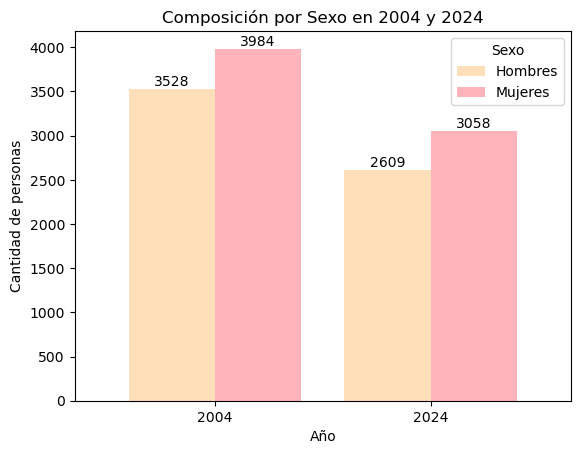

In [382]:
# Filtramos los datos de los años 2004 y 2024
base_sexo_anio = base_limpia3[base_limpia3['ano4'].isin([2004, 2024])]

# Contamos la cantidad de hombres (1) y mujeres (2) por año
cant_sexo_anio = base_sexo_anio.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)

# Renombramos las columnas para mejorar la visualización del gráfico
cant_sexo_anio.columns = ['Hombres', 'Mujeres']

# Graficamos
colors = ['#FFDFBA', '#FFB3BA']
ax = cant_sexo_anio.plot(kind='bar', width=0.8, color=colors)

# Agregamos etiquetas de la composición por sexo en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.title('Composición por Sexo en 2004 y 2024')
plt.xlabel('Año')
plt.ylabel('Cantidad de personas')

# Cambiamos las etiquetas del eje x a enteros
ax.set_xticklabels(['2004', '2024'])

plt.xticks(rotation=0) 
plt.legend(title='Sexo', loc='upper right')
plt.show()

# Comentarios:

# Disminución de Población: La población total ha caído de 3528 hombres y 3984 mujeres en 2004 a 2609 hombres y 
# 3058 mujeres en 2024, indicando una reducción significativa en ambos sexos.

# Proporción de Sexo: La proporción de hombres por mujeres ha disminuido de aproximadamente 0.88 en 2004 a 0.85 en 
# 2024, sugiriendo una feminización de la población o mayor mortalidad masculina.

# Implicaciones Sociales: Esta reducción poblacional puede afectar la economía y los servicios sociales, y plantea la 
# necesidad de estrategias de políticas públicas para abordar la disminución de la fuerza laboral.

# Necesidad de Análisis Futuro: Es importante seguir monitoreando estas tendencias para entender mejor los factores 
# que contribuyen a los cambios en la población.

In [ ]:
# EJ 2. d)
# Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, 
# ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz 
# de correlación. Comenten los resultados

In [384]:
# Seleccionamos las columnas que vamos a usar
columnas = ['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']

# Verificamos los valores únicos de cada columna
for columna in columnas:
    print(f"Valores únicos en {columna}:")
    print(base_limpia3[columna].unique())
    print() 

# Imprimimos los valores úicos de cada columna y vemos que hay tanto palabras como números. Pasamos todo a números para
# poder manipularlo haciendo un mapeo

Valores únicos en ch04:
[1 2]

Valores únicos en ch06:
[79. 67. 74. 54. 51. 25. 20. 55. 48. 17. 15. 77. 50. 49. 26. 22. 18. 86.
 62. 76. 45. 41. 21. 31. 19. 52. 12. 32. 29. 64. 10. 47. 43. 13.  3. 46.
 78. 60. 59. 37. 44. 30. 63. 71. 87. 34. 14. 24. 28. 27. 69. 56. 33. 66.
 61.  1. 92. 65. 57. 23.  4. 40. 16.  9. 83.  6. 38. 75. 11. 53. 73. 39.
 35.  7.  5. 36.  8. 82. 85. 72. 70. 89. 42.  2. 58. 68. 81. 80. 93. 96.
 84. 90. 94. 88. 95. 91.]

Valores únicos en ch07:
['Viudo' 'Separado o divorciado' 'Casado' 'Soltero' 'Unido' 4 5 3 2 1]

Valores únicos en ch08:
['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros públicos' 'Ns./Nr.'
 'Mutual/prepaga/servicio de emergencia/planes y seguros públi' 1 4 12 2 9
 23 13 3]

Valores únicos en nivel_ed:
['Secundaria Incompleta' 'Primaria Completa'
 'Superior Universitaria Completa' 'Superior Universitaria Incompleta'
 'Secundari

In [386]:
# Diccionarios de mapeo
map_ch07 = {
    'Unido': 1, 'Casado': 2, 'Separado o divorciado': 3, 'Viudo': 4, 'Soltero': 5
}
map_ch08 = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.': 9,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y Planes y Seguros Públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y Planes y Seguros Públicos': 123
}
map_nivel_ed = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr.': 9
}
map_estado = {
    'Entrevista individual no realizada (no respuesta al cuestion': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4
}
map_cat_inac = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7
}

# Aplicar los diccionarios de mapeo
base_limpia3['ch07'] = base_limpia3['ch07'].replace(map_ch07)
base_limpia3['ch08'] = base_limpia3['ch08'].replace(map_ch08)
base_limpia3['nivel_ed'] = base_limpia3['nivel_ed'].replace(map_nivel_ed)
base_limpia3['estado'] = base_limpia3['estado'].replace(map_estado)
base_limpia3['cat_inac'] = base_limpia3['cat_inac'].replace(map_cat_inac)

# Verificamos las conversiones
print(base_limpia3[['ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac']].head())

   ch07  ch08  nivel_ed  estado  cat_inac
0     4     1         3       3       1.0
1     3     4         2       1       0.0
2     4     1         2       3       1.0
3     2     2         2       1       0.0
4     2     2         6       3       4.0


/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/428097782.py:44: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_limpia3['ch07'] = base_limpia3['ch07'].replace(map_ch07)
/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/428097782.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_limpia3['ch07'] = base_limpia3['ch07'].replace(map_ch07)
/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/428097782.py:45: FutureWarning: Downcasting behavior in `replace` is deprecated an

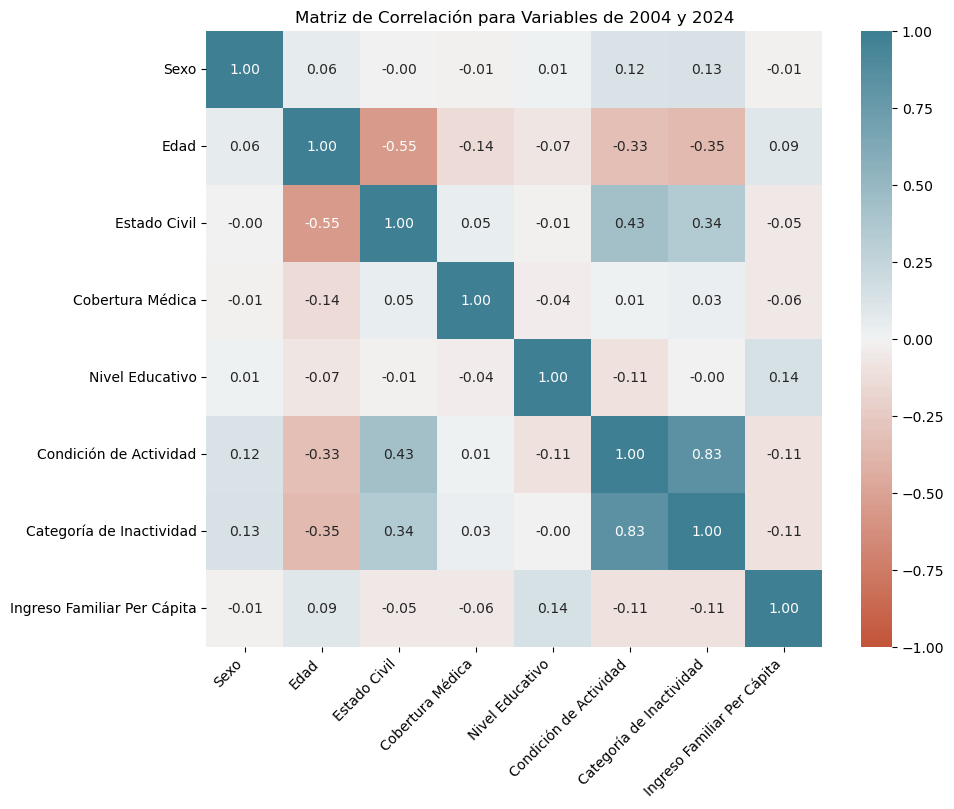

In [388]:
# Diccionario para reemplazar los nombres de columnas con etiquetas más descriptivas
column_labels = {
    'ch04': 'Sexo',
    'ch06': 'Edad',
    'ch07': 'Estado Civil',
    'ch08': 'Cobertura Médica',
    'nivel_ed': 'Nivel Educativo',
    'estado': 'Condición de Actividad',
    'cat_inac': 'Categoría de Inactividad',
    'ipcf': 'Ingreso Familiar Per Cápita'
}

# Creamos la matriz de correlación
correlation_matrix = base_limpia3[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']].corr()

# Renombramos las filas y columnas de la matriz de correlación
correlation_matrix = correlation_matrix.rename(index=column_labels, columns=column_labels)

# Graficamos la matriz de correlación con etiquetas descriptivas
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    correlation_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,  # Muestra los valores de correlación en cada celda
    fmt=".2f"    # Formato de los números dentro del gráfico
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Matriz de Correlación para Variables de 2004 y 2024")
plt.show()

# Comentarios:

# Estado y Categoría de Inactividad: Alta correlación positiva (0.83), lo que sugiere que ciertos tipos de inactividad, 
# como jubilación o estudios, están asociados con el estado de actividad.

# Edad y Estado Civil: Correlación negativa (-0.55), sugiriendo que a mayor edad, hay menos solteros/as y más personas 
# en otros estados civiles.

# Estado Civil y Estado de Actividad: Correlación moderada (0.43), indicando que ciertos estados civiles, como estar 
# casado o viudo, pueden asociarse con el estado de actividad o inactividad.

# Edad y Categoría de inactividad: Correlación negativa moderada (-0.35). Esto significa que a medida que la edad aumenta, 
# las personas tienden a encontrarse menos en ciertas categorías de inactividad como estudiante o ama de casa, y más en 
# otras como jubilado/pensionado.

# Edad y Estado de Actividad: Correlación negativa (-0.33), reflejando que la inactividad aumenta con la edad.

In [ ]:
# EJ 2.e) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar 
# (IPCF) según estado (ocupado, desocupado, inactivo)?

In [390]:
# Contamos ocupados, desocupados e inactivos
# En el diccionario "estado" = condición de actividad.
# 1 = ocupado
# 2 = desocupado
# 3 = inactivo

ocupados = base_limpia3[base_limpia3['estado'] == 1].shape[0]
desocupados = base_limpia3[base_limpia3['estado'] == 2].shape[0]
inactivos = base_limpia3[base_limpia3['estado'] == 3].shape[0]

# Calcular la media de IPCF según estado
media_ipcf_estado = base_limpia3[base_limpia3['estado'].isin([1, 2, 3])].groupby('estado')['ipcf'].mean()

# Resultados
print(f"Número de ocupados: {ocupados}")
print(f"Número de desocupados: {desocupados}")
print(f"Número de inactivos: {inactivos}")
print("\nMedia de IPCF según estado:")
print(media_ipcf_estado)

# Resultados:
# Número de ocupados: 5253
# Número de desocupados: 809
# Número de inactivos: 5246

# Media de IPCF según estado:
# Ocupados:    $127719.823069 
# Desocupados:     $32829.850087
# Inactivos:     $66492.453562

Número de ocupados: 5253
Número de desocupados: 809
Número de inactivos: 5246

Media de IPCF según estado:
estado
1    127719.823069
2     32829.850087
3     66492.453562
Name: ipcf, dtype: float64


In [ ]:
# EJ 3)
# Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos 
# (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? 
# Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición 
# de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [392]:
# Filtramos las observaciones donde no respondieron su condición de actividad
norespondieron = base_limpia3[base_limpia3['estado'] == 0]

# Filtramos las observaciones donde respondieron la condición de actividad
respondieron = base_limpia3[base_limpia3['estado'] != 0]

# Guardamos las bases en archivos diferentes
norespondieron.to_csv('norespondieron.csv', index=False)
respondieron.to_csv('respondieron.csv', index=False)

# Contamos cuántas personas no respondieron
cantidad_norespondieron = norespondieron.shape[0]

# Resultados
print(f"Número de personas que no respondieron su condición de actividad: {cantidad_norespondieron}")
# Número de personas que no respondieron su condición de actividad: 10

Número de personas que no respondieron su condición de actividad: 10


In [ ]:
# EJ 4) Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están 
# ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. 
# Comenten los resultados.

La cantidad de personas PEA en 2004 es: 3606
La cantidad de personas No PEA en 2004 es: 3896
La cantidad de personas PEA en 2024 es: 2456
La cantidad de personas No PEA en 2024 es: 3211


/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/2944350245.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pea'] = respondieron['estado'].apply(calcular_pea)


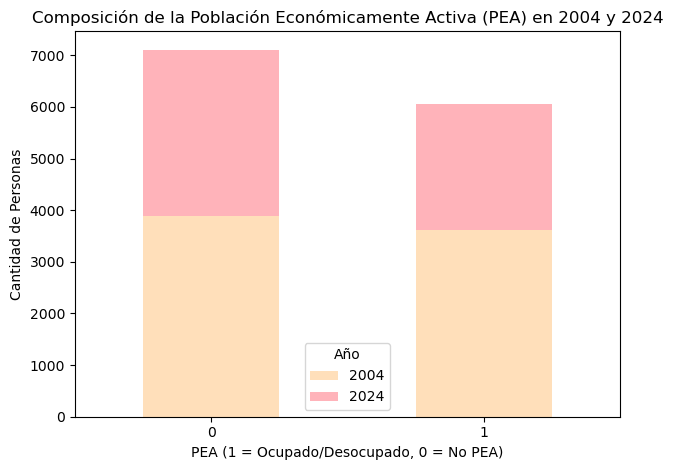

In [394]:
# Definimos una función para calcular PEA
def calcular_pea(estado):
    return 1 if estado in [1, 2] else 0

# Agregamos la columna pea a la base respondieron
respondieron['pea'] = respondieron['estado'].apply(calcular_pea)

# Filtramos las bases para 2004 y 2024
respondieron_2004 = respondieron[respondieron['ano4'] == 2004]
respondieron_2024 = respondieron[respondieron['ano4'] == 2024]

# Contamos la composición de PEA
pea_counts_2004 = respondieron_2004['pea'].value_counts()
pea_counts_2024 = respondieron_2024['pea'].value_counts()

# Creamos un DataFrame para facilitar el gráfico
pea_data = pd.DataFrame({
    '2004': pea_counts_2004,
    '2024': pea_counts_2024
}).fillna(0)  # Rellenar valores NaN con 0

# Creamos un gráfico de barras 
colors = ['#FFDFBA', '#FFB3BA']
ax = pea_data.plot(kind='bar', stacked=True, color=colors)

# Calculamos la cantidad total de personas para cada año
total_pea_2004 = pea_data.loc[1, '2004']  # Ocupados + Desocupados
total_no_pea_2004 = pea_data.loc[0, '2004']  # No PEA
total_pea_2024 = pea_data.loc[1, '2024']  # Ocupados + Desocupados
total_no_pea_2024 = pea_data.loc[0, '2024']  # No PEA

# Imprimimos la cantidad total de personas por PEA o No PEA de 2004 y 2024
print(f'La cantidad de personas PEA en 2004 es: {total_pea_2004}')
print(f'La cantidad de personas No PEA en 2004 es: {total_no_pea_2004}')
print(f'La cantidad de personas PEA en 2024 es: {total_pea_2024}')
print(f'La cantidad de personas No PEA en 2024 es: {total_no_pea_2024}')

plt.title('Composición de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('PEA (1 = Ocupado/Desocupado, 0 = No PEA)')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.tight_layout()  
plt.show()

# Guardamos los cambios en el archivo csv
respondieron.to_csv('respondieron.csv', index=False)

# La cantidad de personas PEA en 2004 es: 3606
# La cantidad de personas No PEA en 2004 es: 3896
# La cantidad de personas PEA en 2024 es: 2456
# La cantidad de personas No PEA en 2024 es: 3211

# Comentarios
# Disminución de la PEA: La cantidad de personas en la Población Económicamente Activa (PEA) ha caído de 3606 en 2004 a 
# 2456 en 2024, lo que podría indicar una menor participación en el mercado laboral o cambios económicos desfavorables.

# Reducción en la No PEA: La cantidad de personas clasificadas como No PEA también ha disminuido, de 3896 en 2004 a 3211 en 
# 2024, lo que sugiere que menos personas están inactivas en términos absolutos.

# Implicaciones Laborales: La reducción de la PEA podría llevar a escasez de mano de obra, afectando la producción y 
# el crecimiento económico.

In [ ]:
# EJ 5) Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están 
# la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando la composición por PEA para 2004 
# y 2024. Comenten los resultados y compare PET con PEA.

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/2941811097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['pet'] = respondieron['ch06'].apply(calcular_pet)  # ch06 es la edad


Cantidad total PET 2004: 7502 (En Edad para trabajar: 4893, Fuera de edad para trabajar: 2609)
Cantidad total PET 2024: 5667 (En Edad para trabajar: 3582, Fuera de edad para trabajar: 2085)


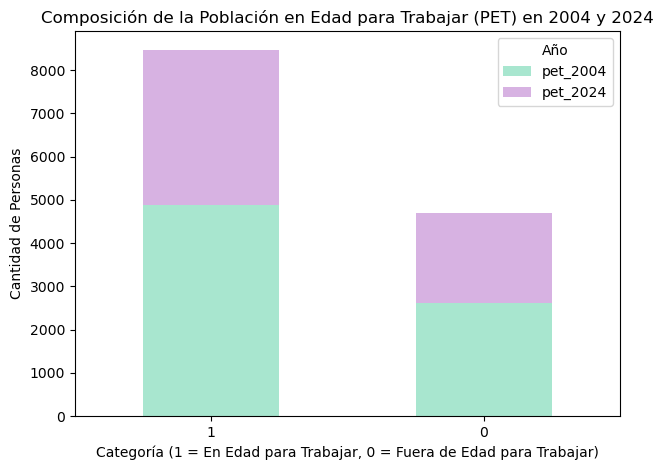

In [396]:
# Definimos la función para calcular la PET
def calcular_pet(edad):
    return 1 if 15 <= edad <= 65 else 0

# Agregamos la columna pet a la base respondieron
respondieron['pet'] = respondieron['ch06'].apply(calcular_pet)  # ch06 es la edad

# Filtramos las bases para 2004 y 2024
respondieron_2004 = respondieron[respondieron['ano4'] == 2004]
respondieron_2024 = respondieron[respondieron['ano4'] == 2024]

# Contamos la composición de PET
pet_counts_2004 = respondieron_2004['pet'].value_counts()
pet_counts_2024 = respondieron_2024['pet'].value_counts()

# Creamos un DataFrame para facilitar el gráfico
pet_data = pd.DataFrame({
    'pet_2004': pet_counts_2004,
    'pet_2024': pet_counts_2024
}).fillna(0)  # Rellenar valores NaN con 0

# Creamos un gráfico de barras
colors = ['#A8E6CF', '#D7B2E2'] 
ax = pet_data.plot(kind='bar', stacked=True, color=colors)

# Imprimimos las cantidades totales de PET por categoría
total_pet_2004 = pet_data['pet_2004'].sum()
total_pet_2024 = pet_data['pet_2024'].sum()
edad_trabajo_2004 = pet_counts_2004.get(1, 0)
no_edad_trabajo_2004 = pet_counts_2004.get(0, 0)
edad_trabajo_2024 = pet_counts_2024.get(1, 0)
no_edad_trabajo_2024 = pet_counts_2024.get(0, 0)

# Print de resultados
print(f'Cantidad total PET 2004: {total_pet_2004} (En Edad para trabajar: {edad_trabajo_2004}, Fuera de edad para trabajar: {no_edad_trabajo_2004})')
print(f'Cantidad total PET 2024: {total_pet_2024} (En Edad para trabajar: {edad_trabajo_2024}, Fuera de edad para trabajar: {no_edad_trabajo_2024})')

plt.title('Composición de la Población en Edad para Trabajar (PET) en 2004 y 2024')
plt.xlabel('Categoría (1 = En Edad para Trabajar, 0 = Fuera de Edad para Trabajar)')
plt.ylabel('Cantidad de Personas')
plt.xticks(rotation=0)
plt.legend(title='Año')
plt.tight_layout()  
plt.show()

# Guardamos los cambios en el archivo csv
respondieron.to_csv('respondieron.csv', index=False)

# Resultados
# Cantidad total PET 2004: 7502 (Edad para trabajar: 4893, Fuera de edad para trabajar: 2609)
# Cantidad total PET 2024: 5667 (Edad para trabajar: 3582, Fuera de edad para trabajar: 2085)

# Comentarios sobre la PET (Población en Edad para Trabajar) para los años 2004 y 2024
# Disminución de la PET: La cantidad total de PET ha disminuido de 7502 en 2004 a 5667 en 2024. Esta reducción de 
# aprox el 24% sugiere un cambio significativo en la estructura de la población entre estos años.

# Cambio en la Población en Edad para Trabajar: En 2004, 4893 personas estaban en edad de trabajar, mientras que en 2024, 
# esa cifra se ha reducido a 3582. Esto representa una disminución de alrededor del 27% en el número de personas que se 
# consideran potencialmente disponibles para el mercado laboral.

# Reducción de la Población Fuera de Edad para Trabajar: Por otro lado, la cantidad de personas fuera de edad para trabajar 
# también ha disminuido, de 2609 en 2004 a 2085 en 2024. Aunque hay una reducción en este grupo, la caída es menor 
# (aprox un 20%), lo que indica que la proporción de personas en edad de trabajar ha disminuido más drásticamente.

# Implicaciones: La reducción en la PET y, particularmente, en la cantidad de personas en edad laboral puede tener importantes
# implicaciones para la economía. Una menor población en edad de trabajar puede resultar en una menor oferta de mano de obra, 
# lo que podría afectar la productividad y el crecimiento económico.

In [ ]:
# EJ 6)
# Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. 
# ¿Cuántas personas están desocupadas en 2004 vs 2024?

In [398]:
# Definimos la función para identificar desocupados
def marcar_desocupado(estado):
    return 1 if estado == 2 else 0  # Estado 2 indica desocupado

# Agregamos la columna desocupado a la base respondieron
respondieron['desocupado'] = respondieron['estado'].apply(marcar_desocupado)

# Contamos cuántas personas están desocupadas en 2004 y 2024
desocupados_2004 = respondieron[respondieron['ano4'] == 2004]['desocupado'].sum()
desocupados_2024 = respondieron[respondieron['ano4'] == 2024]['desocupado'].sum()

# Print de resultados
print(f'Cantidad de personas desocupadas en 2004: {desocupados_2004}')
print(f'Cantidad de personas desocupadas en 2024: {desocupados_2024}')

# Calculamos el porcentaje de variación en desocupación
if desocupados_2004 != 0:  # Para evitar división por cero
    variacion_desocupacion = ((desocupados_2024 - desocupados_2004) / desocupados_2004) * 100
    print(f'La variación porcentual en la desocupación entre 2004 y 2024 es: {variacion_desocupacion:.2f}%')
else:
    print('No hay datos de desocupación para 2004 para calcular la variación.')

# Guardamos los cambios en el archivo csv
respondieron.to_csv('respondieron.csv', index=False)

# Resultados:
# Cantidad de personas desocupadas en 2004: 528
# Cantidad de personas desocupadas en 2024: 281
# La variación porcentual en la desocupación entre 2004 y 2024 es: -46.78%

# Comentarios
# Reducción de la Desocupación: En 2004, había 528 personas desocupadas, mientras que en 2024 esta cifra ha disminuido a 281. 
# Esto indica una reducción significativa de aproximadamente el 47% en el número de personas desocupadas en el período de 20 años.

# Interpretación de la Variación: La disminución en la desocupación sugiere una mejora en el mercado laboral durante este 
# período. Podría implicar que más personas han encontrado empleo o que hay una menor proporción de la población activa sin trabajo.

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/1631321795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(marcar_desocupado)


Cantidad de personas desocupadas en 2004: 528
Cantidad de personas desocupadas en 2024: 281
La variación porcentual en la desocupación entre 2004 y 2024 es: -46.78%


In [ ]:
# EJ 6. a)
# (Opcional) Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados 
# por nivel educativo?

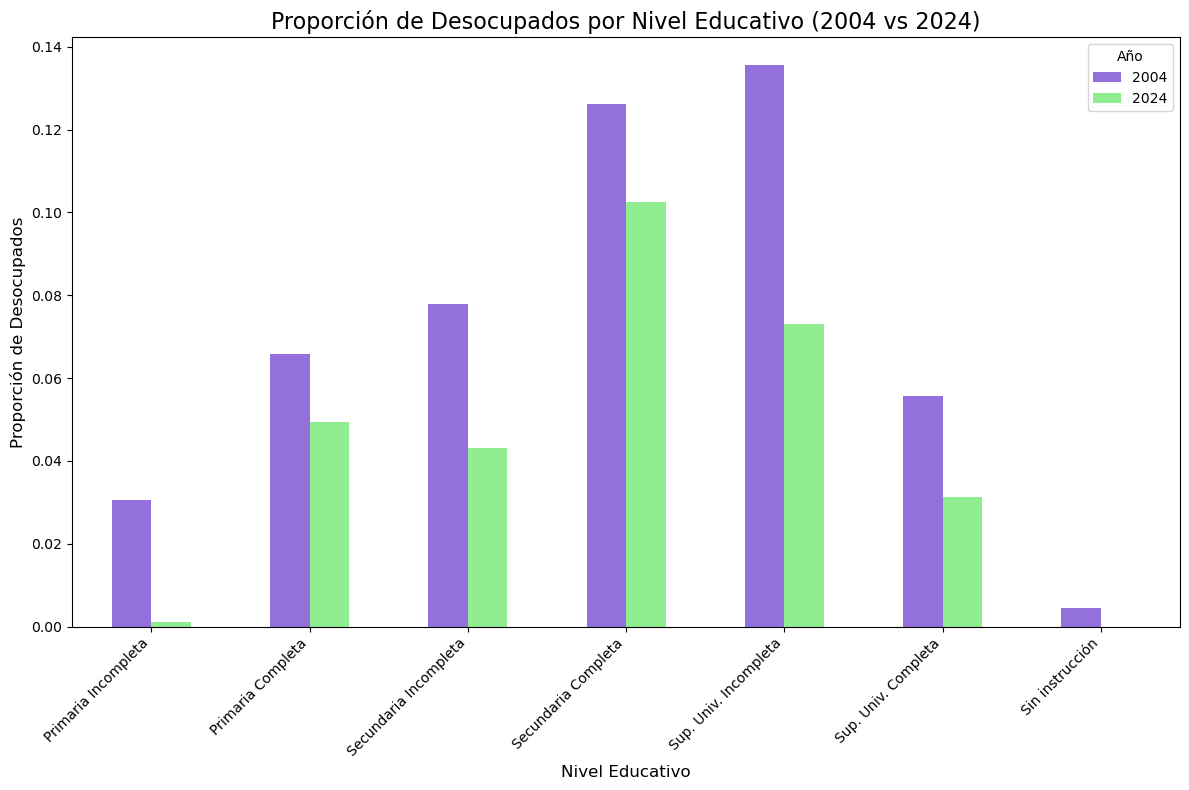

In [400]:
# Filtramos los datos por años de interés
datos_2004 = base_limpia3[base_limpia3['ano4'] == 2004]
datos_2024 = base_limpia3[base_limpia3['ano4'] == 2024]

# Agrupamos por nivel educativo y calculamos la proporción de desocupados en cada nivel para 2004
proporcion_desocupados_2004 = datos_2004[datos_2004['estado'] == 2].groupby('nivel_ed').size() / datos_2004.groupby('nivel_ed').size()

# Agrupamos por nivel educativo y calculamos la proporción de desocupados en cada nivel para 2024
proporcion_desocupados_2024 = datos_2024[datos_2024['estado'] == 2].groupby('nivel_ed').size() / datos_2024.groupby('nivel_ed').size()

# Creamos un DataFrame para facilitar la comparación
proporcion_desocupados = pd.DataFrame({
    '2004': proporcion_desocupados_2004,
    '2024': proporcion_desocupados_2024
}).reset_index()

# Mapeamos los niveles educativos a etiquetas solo para el gráfico
nivel_educativo_labels = {
    1: 'Primaria Incompleta',
    2: 'Primaria Completa',
    3: 'Secundaria Incompleta',
    4: 'Secundaria Completa',
    5: 'Sup. Univ. Incompleta',
    6: 'Sup. Univ. Completa',
    7: 'Sin instrucción',
    9: 'Ns./ Nr.'
}
proporcion_desocupados['nivel_ed'] = proporcion_desocupados['nivel_ed'].replace(nivel_educativo_labels)
fig, ax = plt.subplots(figsize=(12, 8))

# Gráfico de barras para 2004 y 2024
proporcion_desocupados.plot(
    x='nivel_ed',
    kind='bar',
    ax=ax,
    color=['#9370DB', '#90EE90']
)

# Configuramos etiquetas y título
ax.set_title("Proporción de Desocupados por Nivel Educativo (2004 vs 2024)", fontsize=16)
ax.set_xlabel("Nivel Educativo", fontsize=12)
ax.set_ylabel("Proporción de Desocupados", fontsize=12)
ax.legend(title="Año", labels=["2004", "2024"], fontsize=10)
plt.xticks(rotation=45, ha='right')

# Mostramos el gráfico
plt.tight_layout()
plt.show()

# Comentarios

# El gráfico muestra que la desocupación ha disminuido significativamente en todos los niveles educativos entre 2004 y 2024. 
# En 2004, las mayores proporciones de desocupados se encontraban en los niveles de "Secundaria Completa" y "Superior 
# Universitario Incompleto", mientras que en 2024 estas proporciones son menores, destacando una mejora especialmente en el 
# grupo de "Secundaria Completa".

# Además, los niveles de desocupación para personas con "Primaria Completa" y "Secundaria Incompleta" también han disminuido, 
# aunque todavía presentan cifras relativamente altas en comparación con otros niveles educativos. Esto sugiere que, a pesar 
# de la mejora general en el mercado laboral, quienes no completan sus estudios secundarios siguen enfrentando mayores 
# dificultades para encontrar empleo.

In [ ]:
# EJ 6. b)
# (Opcional) Cree una variable categórica de años cumplidos(CH06) agrupada de a 10 años. Muestre proporción de desocupados por
# edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/4117364208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['edad_grupo'] = pd.cut(respondieron['ch06'],
/var/folders/80/gzgqn7bd7pqcf1x058lykxh80000gn/T/ipykernel_5464/4117364208.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['ano4', 'edad_grupo'])


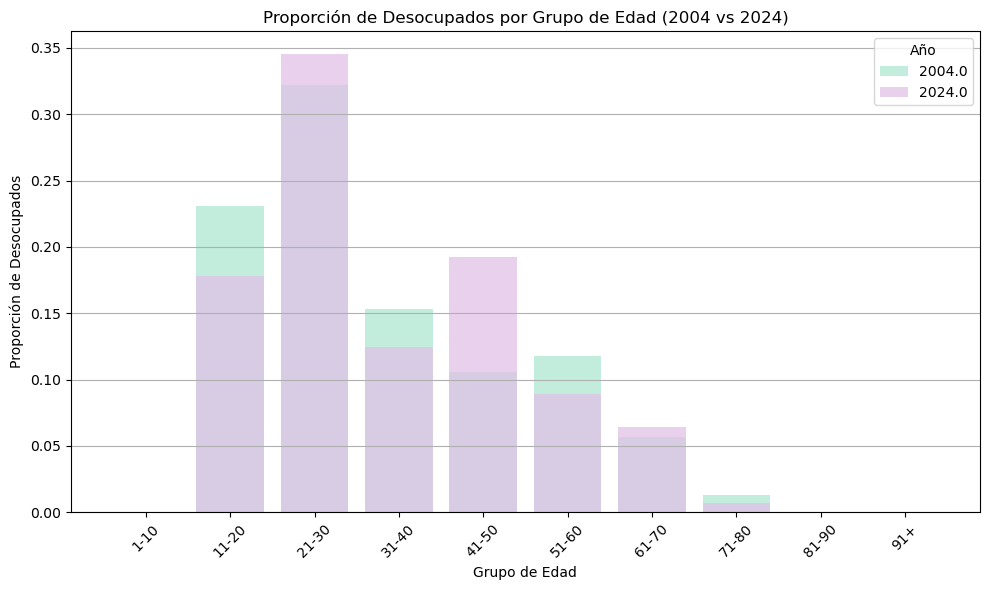

      ano4 edad_grupo  cantidad_desocupados  proporcion
0   2004.0       1-10                     0    0.000000
1   2004.0      11-20                   122    0.231061
2   2004.0      21-30                   170    0.321970
3   2004.0      31-40                    81    0.153409
4   2004.0      41-50                    56    0.106061
5   2004.0      51-60                    62    0.117424
6   2004.0      61-70                    30    0.056818
7   2004.0      71-80                     7    0.013258
8   2004.0      81-90                     0    0.000000
9   2004.0        91+                     0    0.000000
10  2024.0       1-10                     0    0.000000
11  2024.0      11-20                    50    0.177936
12  2024.0      21-30                    97    0.345196
13  2024.0      31-40                    35    0.124555
14  2024.0      41-50                    54    0.192171
15  2024.0      51-60                    25    0.088968
16  2024.0      61-70                    18    0

In [402]:
# Creamos una variable categórica de edad agrupada en intervalos de 10 años
respondieron['edad_grupo'] = pd.cut(respondieron['ch06'], 
                                     bins=range(1, 102, 10),  # Desde 1 hasta 100, en intervalos de 10
                                     right=False,  # El límite superior no se incluye
                                     labels=[f'{i}-{i+9}' for i in range(1, 91, 10)] + ['91+'])

# Calculamos la cantidad de desocupados por grupo de edad y año
desocupados_por_edad = (respondieron[respondieron['desocupado'] == 1]
                        .groupby(['ano4', 'edad_grupo'])
                        .size()
                        .reset_index(name='cantidad_desocupados'))

# Calcular la proporción total de desocupados por año
total_desocupados = desocupados_por_edad.groupby('ano4')['cantidad_desocupados'].sum().reset_index()
total_desocupados.rename(columns={'cantidad_desocupados': 'cantidad_desocupados_total'}, inplace=True)

# Merge para calcular la proporción
desocupados_por_edad = desocupados_por_edad.merge(total_desocupados, on='ano4')
desocupados_por_edad['proporcion'] = desocupados_por_edad['cantidad_desocupados'] / desocupados_por_edad['cantidad_desocupados_total']

# Graficamos
colores = ['#a8e6cf', '#e1bee7']
plt.figure(figsize=(10, 6))
for i, year in enumerate(desocupados_por_edad['ano4'].unique()):
    subset = desocupados_por_edad[desocupados_por_edad['ano4'] == year]
    plt.bar(subset['edad_grupo'], subset['proporcion'], label=str(year), color=colores[i % len(colores)], alpha=0.7)

plt.title('Proporción de Desocupados por Grupo de Edad (2004 vs 2024)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Proporción de Desocupados')
plt.legend(title='Año')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Print de resultados
print(desocupados_por_edad[['ano4', 'edad_grupo', 'cantidad_desocupados', 'proporcion']])

# Comentarios

# Mayor desocupación en jóvenes: En ambos años, el grupo de 21-30 años presenta la mayor proporción de desocupados (32.2% en 
# 2004 y 34.5% en 2024), lo que refleja la persistencia de dificultades para ingresar al mercado laboral.

# Disminución en 11-20 años: La proporción baja del 23.1% en 2004 al 17.8% en 2024, posiblemente por mayor permanencia en 
# el sistema educativo o programas de empleo juvenil.

# Aumento en 41-50 años: La desocupación en este grupo crece del 10.6% al 19.2%, sugiriendo dificultades para adultos 
# con experiencia en adaptarse a las nuevas demandas del mercado laboral.

# Leve mejora en 51-60 años: La proporción baja de 11.7% en 2004 a 8.9% en 2024, lo que podría indicar mayor estabilidad 
# o jubilaciones anticipadas.

# Estabilidad en mayores: Los grupos de 71 años en adelante muestran baja o nula desocupación en ambos años, lo que es 
# coherente con su baja participación laboral.

# En general, se observa que, aunque los jóvenes siguen siendo los más afectados, en 2024 las personas de mediana edad 
# también enfrentan más dificultades para mantenerse en el empleo.

In [ ]:
#### PARTE II

In [ ]:
# El objetivo de esta parte del trabajo es intentar predecir si una persona está desocupada o no utilizando distintas 
# variables de características individuales.

In [ ]:
# EJ 1)
# Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el 
# comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar 
# (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento 
# (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# EJ 2
# Implementen los siguientes métodos reportando luego la matriz de confusión, la curva ROC, los valores de AUC y de 
# Accuracy de cada uno:
# Regresión logística
# Análisis discriminante lineal
# KNN con k=3
# Naive Bayes